In [61]:
import src as SOGA
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import time


# Experimental evaluation

## Case studies with exact Gaussian Mixture semantics

## Differential privacy with Gaussian mechanism
### Code for plots in Figure 5 and 6

In [2]:
compiled_case_1_exp1 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case1/experiment1.soga')
cfg_case_1_exp1 = SOGA.produce_cfg(compiled_case_1_exp1)
output_dist_case_1_exp1 = SOGA.start_SOGA(cfg_case_1_exp1)

compiled_case_1_exp2 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case1/experiment2.soga')
cfg_case_1_exp2 = SOGA.produce_cfg(compiled_case_1_exp2)
output_dist_case_1_exp2 = SOGA.start_SOGA(cfg_case_1_exp2)

compiled_case_1_exp3 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case1/experiment3.soga')
cfg_case_1_exp3 = SOGA.produce_cfg(compiled_case_1_exp3)
output_dist_case_1_exp3 = SOGA.start_SOGA(cfg_case_1_exp3)

In [3]:
#The acutal sampled values:
meanm2130 = [553663., 433856., 713989., 471166., 435411., 745048., 577540., 540576., 442278., 504165.] 
meanm3140 = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150 = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160 = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130 = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

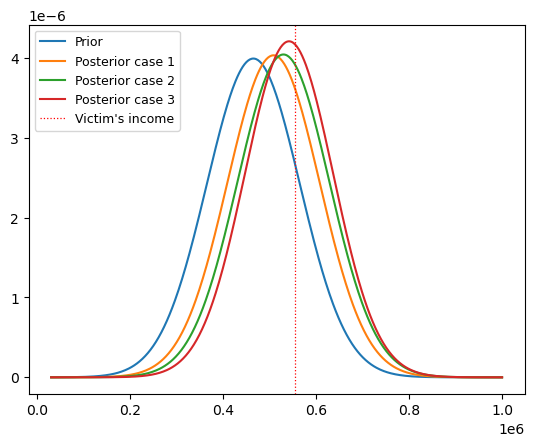

In [4]:
x = np.linspace(30000,1000000,500)

prior1 = norm.pdf(x, loc=465000, scale=100000)
posterior1 = output_dist_case_1_exp1.gm.marg_pdf(x, 0)

prior2 = norm.pdf(x, loc=465000, scale=100000)
posterior2 = output_dist_case_1_exp2.gm.marg_pdf(x, 0)

prior3 = norm.pdf(x, loc=465000, scale=100000)
posterior3 = output_dist_case_1_exp3.gm.marg_pdf(x, 0)

plt.plot(x, prior1, label='Prior')
plt.plot(x, posterior1, label='Posterior case 1')
plt.plot(x, posterior2, label='Posterior case 2')
plt.plot(x, posterior3, label='Posterior case 3')
w = 0.3
w2130 = 0.9
for val in meanm2130:
    if(val == 553663):
        plt.axvline( val, color="red",linestyle = 'dotted',linewidth=w2130, label="Victim's income")

plt.legend(loc="upper left",  fontsize="9")
plt.savefig("soga_risk.pdf", format="pdf", bbox_inches="tight")

### Calculating the effect sizes of the 3 cases
To calculate effect sizes we use Cohen's d (x1 - x2)/std where x1 is the mean of the prior and x2 is the mean of the posteror and std is the standard deviation of the posterior

In [5]:
#Scenario 1
print(f'effect size case 1: {(465000 - output_dist_case_1_exp1.gm.mean()[0])/np.sqrt(output_dist_case_1_exp1.gm.cov()[0][0])}')
#Scenario 2
print(f'effect size case 2: {(465000 - output_dist_case_1_exp2.gm.mean()[0])/np.sqrt(output_dist_case_1_exp2.gm.cov()[0][0])}')
#Scenario 3
print(f'effect size case 3: {(465000 - output_dist_case_1_exp3.gm.mean()[0])/np.sqrt(output_dist_case_1_exp3.gm.cov()[0][0])}')



effect size case 1: -0.4382960977083031
effect size case 2: -0.655166921420285
effect size case 3: -0.8092184204966606


## With an outlier

In the second experiment we create an outlier in the group male2130 by manually changing the value to 999999.
We can see that for scenario 1 and 2 (all people and all males) this does not have any visible effect.
It is only when we add the observation for all people in age group male2130 it changes a bit.
Perhaps a single outlier is not enough.

The outlier is the red dotted line in the plot

In [5]:
compiled_case_2_exp1 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case2/experiment1.soga')
cfg_case_2_exp1 = SOGA.produce_cfg(compiled_case_2_exp1)
output_dist_case_2_exp1 = SOGA.start_SOGA(cfg_case_2_exp1)

compiled_case_2_exp2 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case2/experiment2.soga')
cfg_case_2_exp2 = SOGA.produce_cfg(compiled_case_2_exp2)
output_dist_case_2_exp2 = SOGA.start_SOGA(cfg_case_2_exp2)

compiled_case_2_exp3 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case2/experiment3.soga')
cfg_case_2_exp3 = SOGA.produce_cfg(compiled_case_2_exp3)
output_dist_case_2_exp3 = SOGA.start_SOGA(cfg_case_2_exp3)

In [6]:
#The acutal sampled values:
meanm2130_2 = [999999., 433856., 713989., 471166., 435411., 745048., 577540., 540576., 442278., 504165.] 
meanm3140_2 = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150_2 = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160_2 = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130_2 = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

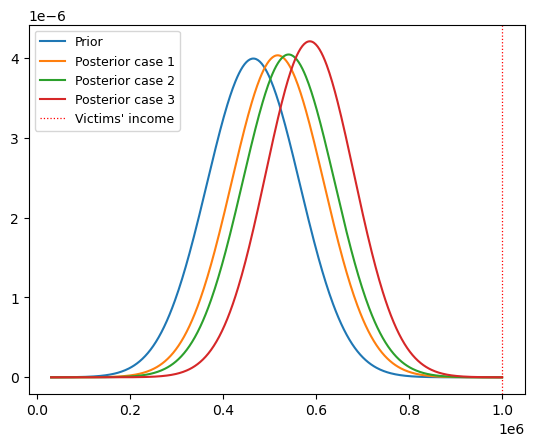

In [7]:
x = np.linspace(30000,1000000,500)

prior1 = norm.pdf(x, loc=465000, scale=100000)
posterior1 = output_dist_case_2_exp1.gm.marg_pdf(x, 0)

prior2 = norm.pdf(x, loc=465000, scale=100000)
posterior2 = output_dist_case_2_exp2.gm.marg_pdf(x, 0)

prior3 = norm.pdf(x, loc=465000, scale=100000)
posterior3 = output_dist_case_2_exp3.gm.marg_pdf(x, 0)

plt.plot(x, prior1, label='Prior')
plt.plot(x, posterior1, label='Posterior case 1')
plt.plot(x, posterior2, label='Posterior case 2')
plt.plot(x, posterior3, label='Posterior case 3')

w = 0.3
w2130 = 0.9
for val in meanm2130_2:
    if(val == 999999):
        plt.axvline( val, color="red",linestyle = 'dotted',linewidth=w2130, label="Victims' income")

plt.legend(loc="upper left",  fontsize="9")
plt.savefig("soga_risk_outlier.pdf", format="pdf", bbox_inches="tight")

In [9]:
#Scenario 1
print(f'effect size case 1: {(465000 - output_dist_case_2_exp1.gm.mean()[0])/np.sqrt(output_dist_case_2_exp1.gm.cov()[0][0])}')
#Scenario 2
print(f'effect size case 2: {(465000 - output_dist_case_2_exp2.gm.mean()[0])/np.sqrt(output_dist_case_2_exp2.gm.cov()[0][0])}')
#Scenario 3
print(f'effect size case 3: {(465000 - output_dist_case_2_exp3.gm.mean()[0])/np.sqrt(output_dist_case_2_exp3.gm.cov()[0][0])}')

effect size case 1: -0.5284695869333544
effect size case 2: -0.7681724309569479
effect size case 3: -1.2796978744062995


## Varying group sizes

Varying group sizes. This experiment contains an outlier like in case 2. But now we reduce the group size gradually.

In [8]:
compiled_case_3_exp1 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment1.soga')
cfg_case_3_exp1 = SOGA.produce_cfg(compiled_case_3_exp1)
output_dist_case_3_exp1 = SOGA.start_SOGA(cfg_case_3_exp1)

compiled_case_3_exp2 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment2.soga')
cfg_case_3_exp2 = SOGA.produce_cfg(compiled_case_3_exp2)
output_dist_case_3_exp2 = SOGA.start_SOGA(cfg_case_3_exp2)

compiled_case_3_exp3 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment3.soga')
cfg_case_3_exp3 = SOGA.produce_cfg(compiled_case_3_exp3)
output_dist_case_3_exp3 = SOGA.start_SOGA(cfg_case_3_exp3)

In [9]:
compiled_case_3_exp4 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment4.soga')
cfg_case_3_exp4 = SOGA.produce_cfg(compiled_case_3_exp4)
output_dist_case_3_exp4 = SOGA.start_SOGA(cfg_case_3_exp4)

compiled_case_3_exp5 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment5.soga')
cfg_case_3_exp5 = SOGA.produce_cfg(compiled_case_3_exp5)
output_dist_case_3_exp5 = SOGA.start_SOGA(cfg_case_3_exp5)

compiled_case_3_exp6 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case3/experiment6.soga')
cfg_case_3_exp6 = SOGA.produce_cfg(compiled_case_3_exp6)
output_dist_case_3_exp6 = SOGA.start_SOGA(cfg_case_3_exp6)

In [10]:
#The acutal sampled values with 7 people in male2130 group:
meanm2130_3 = [999999., 433856., 713989., 471166., 435411., 745048., 577540.] 
meanm3140_3 = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150_3 = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160_3 = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130_3 = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

In [11]:
#The acutal sampled values with 5 people in male2130 group:
meanm2130_3b = [999999., 433856., 713989., 471166., 435411.] 
meanm3140_3b = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150_3b = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160_3b = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130_3b = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

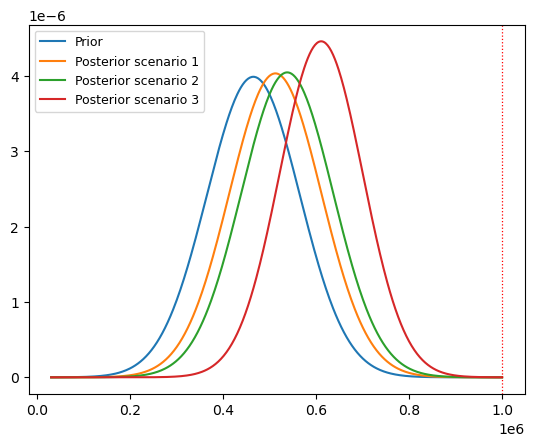

In [12]:
x = np.linspace(30000,1000000,500)

#######################################################
#### Plotting for group with 7 people
#######################################################
prior1 = norm.pdf(x, loc=465000, scale=100000)
posterior1 = output_dist_case_3_exp1.gm.marg_pdf(x, 0)

posterior2 = output_dist_case_3_exp2.gm.marg_pdf(x, 0)

posterior3 = output_dist_case_3_exp3.gm.marg_pdf(x, 0)

w = 0.3
w2130 = 0.9

#######################################################
#### Plotting for group with 5 people
#######################################################

posterior1b = output_dist_case_3_exp4.gm.marg_pdf(x, 0)
posterior2b = output_dist_case_3_exp5.gm.marg_pdf(x, 0)
posterior3b = output_dist_case_3_exp6.gm.marg_pdf(x, 0)


plt.plot(x, prior1, label='Prior')
plt.plot(x, posterior1b, label='Posterior scenario 1')
plt.plot(x, posterior2b, label='Posterior scenario 2')
plt.plot(x, posterior3b, label='Posterior scenario 3')

for val in meanm2130_3b:
    if(val == 999999):
        plt.axvline( val, color="red",linestyle = 'dotted',linewidth=w2130)

plt.legend(loc="upper left",  fontsize="9")
plt.savefig("soga_risk_outlier_small_group.pdf", format="pdf", bbox_inches="tight")

In [40]:
#Scenario 1
print(f'effect size case 1: {(465000 - output_dist_case_3_exp1.gm.mean()[0])/np.sqrt(output_dist_case_3_exp1.gm.cov()[0][0])}')
#Scenario 2
print(f'effect size case 2: {(465000 - output_dist_case_3_exp2.gm.mean()[0])/np.sqrt(output_dist_case_3_exp2.gm.cov()[0][0])}')
#Scenario 3
print(f'effect size case 3: {(465000 - output_dist_case_3_exp3.gm.mean()[0])/np.sqrt(output_dist_case_3_exp3.gm.cov()[0][0])}')
#Scenario 1b
print(f'effect size case 1b: {(465000 - output_dist_case_3_exp4.gm.mean()[0])/np.sqrt(output_dist_case_3_exp4.gm.cov()[0][0])}')
#Scenario 2b
print(f'effect size case 2b: {(465000 - output_dist_case_3_exp5.gm.mean()[0])/np.sqrt(output_dist_case_3_exp5.gm.cov()[0][0])}')
#Scenario 3b
print(f'effect size case 3b: {(465000 - output_dist_case_3_exp6.gm.mean()[0])/np.sqrt(output_dist_case_3_exp6.gm.cov()[0][0])}')

effect size case 1: -0.5427780468082044
effect size case 2: -0.8061082418237969
effect size case 3: -1.73129747421386
effect size case 1b: -0.4789479870794367
effect size case 2b: -0.739043125870075
effect size case 3b: -1.6310349402158735


## Differential privacy  

In [13]:
meanm2130_4 = [999999., 433856., 713989., 471166., 435411., 745048., 577540.] 
meanm3140_4 = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150_4 = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160_4 = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130_4 = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

In [28]:
def calculate_noise(db, epsilon): 
    max_income  = max(db)
    min_income  = min(db)   
    size_db     = len(db)
    sensitivity = (max_income - min_income) / size_db 
    print("sens")
    print(sensitivity)
    delta       = 1 / (size_db**2)
    print("del")
    print(delta)
    variance    = (2*(sensitivity**2)*np.log(1.25/delta)) / (epsilon**2)
    return variance

db_male_21_30_4 = meanm2130_4
db_all_male     = meanm2130_4 + meanm3140_4 + meanm4150_4 + meanm5160_4
db_all          = meanm2130_4 + meanm3140_4 + meanm4150_4 + meanm5160_4 + meanf2130_4
print(f'DB = male group 21-30, ϵ = 1 and variance = {calculate_noise(db_male_21_30_4, 1)}')
print(f'DB = male group 21-30, ϵ = 0.5 and variance =  = {calculate_noise(db_male_21_30_4, 0.5)}')
print(f'DB = male group 21-30, ϵ = 0.3 and variance = {calculate_noise(db_male_21_30_4, 0.3)}')
print()
print(f'DB = all male, ϵ = 1 and variance = {calculate_noise(db_all_male, 1)}')
print(f'DB = all male, ϵ = 0.5 and variance =  = {calculate_noise(db_all_male, 0.5)}')
print(f'DB = all male, ϵ = 0.3 and variance = {calculate_noise(db_all_male, 0.3)}')
print()
print(f'DB = all, ϵ = 1 and variance = {calculate_noise(db_all, 1)}')
print(f'DB = all, ϵ = 0.5 and variance =  = {calculate_noise(db_all, 0.5)}')
print(f'DB = all, ϵ = 0.3 and variance = {calculate_noise(db_all, 0.3)}')
print()
print("------- High epsiolon -------")
print(f'DB = male group 21-30, ϵ = 20 and variance = {calculate_noise(db_male_21_30_4, 20)}')
print(f'DB = all male, ϵ = 20 and variance = {calculate_noise(db_all_male, 20)}')
print(f'DB = all, ϵ = 20 and variance = {calculate_noise(db_all, 20)}')
print("-----------------------------------------")
print(f'DB = male group 21-30, ϵ = 10000 and variance = {calculate_noise(db_male_21_30_4, 10_000)}')
print(f'DB = all male, ϵ = 10000 and variance = {calculate_noise(db_all_male, 10_000)}')
print(f'DB = all, ϵ = 10000 and variance = {calculate_noise(db_all, 10_000)}')

sens
80877.57142857143
del
0.02040816326530612
DB = male group 21-30, ϵ = 1 and variance = 53833451305.360344
sens
80877.57142857143
del
0.02040816326530612
DB = male group 21-30, ϵ = 0.5 and variance =  = 215333805221.44138
sens
80877.57142857143
del
0.02040816326530612
DB = male group 21-30, ϵ = 0.3 and variance = 598149458948.4482

sens
17111.62162162162
del
0.0007304601899196494
DB = all male, ϵ = 1 and variance = 4359893005.051125
sens
17111.62162162162
del
0.0007304601899196494
DB = all male, ϵ = 0.5 and variance =  = 17439572020.2045
sens
17111.62162162162
del
0.0007304601899196494
DB = all male, ϵ = 0.3 and variance = 48443255611.67916

sens
16538.106382978724
del
0.0004526935264825713
DB = all, ϵ = 1 and variance = 4334263030.198959
sens
16538.106382978724
del
0.0004526935264825713
DB = all, ϵ = 0.5 and variance =  = 17337052120.795837
sens
16538.106382978724
del
0.0004526935264825713
DB = all, ϵ = 0.3 and variance = 48158478113.32177

------- High epsiolon -------
sens
80877.

In [17]:
compiled_case_4_exp1a =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment1a.soga')
cfg_case_4_exp1a = SOGA.produce_cfg(compiled_case_4_exp1a)
output_dist_case_4_exp1a = SOGA.start_SOGA(cfg_case_4_exp1a)

compiled_case_4_exp1b =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment1b.soga')
cfg_case_4_exp1b = SOGA.produce_cfg(compiled_case_4_exp1b)
output_dist_case_4_exp1b = SOGA.start_SOGA(cfg_case_4_exp1b)

compiled_case_4_exp1c =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment1c.soga')
cfg_case_4_exp1c = SOGA.produce_cfg(compiled_case_4_exp1c)
output_dist_case_4_exp1c = SOGA.start_SOGA(cfg_case_4_exp1c)


compiled_case_4_exp2a =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment2a.soga')
cfg_case_4_exp2a = SOGA.produce_cfg(compiled_case_4_exp2a)
output_dist_case_4_exp2a = SOGA.start_SOGA(cfg_case_4_exp2a)

compiled_case_4_exp2b =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment2b.soga')
cfg_case_4_exp2b = SOGA.produce_cfg(compiled_case_4_exp2b)
output_dist_case_4_exp2b = SOGA.start_SOGA(cfg_case_4_exp2b)

compiled_case_4_exp2c =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment2c.soga')
cfg_case_4_exp2c = SOGA.produce_cfg(compiled_case_4_exp2c)
output_dist_case_4_exp2c = SOGA.start_SOGA(cfg_case_4_exp2c)


compiled_case_4_exp3a =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment3a.soga')
cfg_case_4_exp3a = SOGA.produce_cfg(compiled_case_4_exp3a)
output_dist_case_4_exp3a = SOGA.start_SOGA(cfg_case_4_exp3a)

compiled_case_4_exp3b =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment3b.soga')
cfg_case_4_exp3b = SOGA.produce_cfg(compiled_case_4_exp3b)
output_dist_case_4_exp3b = SOGA.start_SOGA(cfg_case_4_exp3b)

compiled_case_4_exp3c =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/experiment3c.soga')
cfg_case_4_exp3c = SOGA.produce_cfg(compiled_case_4_exp3c)
output_dist_case_4_exp3c = SOGA.start_SOGA(cfg_case_4_exp3c)

compiled_high_eps1 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/high_epsilon_1.soga')
cfg_high_eps1 = SOGA.produce_cfg(compiled_high_eps1)
output_dist_high_eps1 = SOGA.start_SOGA(cfg_high_eps1)

compiled_high_eps2 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/high_epsilon_2.soga')
cfg_high_eps2 = SOGA.produce_cfg(compiled_high_eps2)
output_dist_high_eps2 = SOGA.start_SOGA(cfg_high_eps2)

compiled_high_eps3 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/high_epsilon_3.soga')
cfg_high_eps3 = SOGA.produce_cfg(compiled_high_eps3)
output_dist_high_eps3 = SOGA.start_SOGA(cfg_high_eps3)


compiled_10khigh_eps1 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/10khigh_epsilon_1.soga')
cfg_10khigh_eps1 = SOGA.produce_cfg(compiled_10khigh_eps1)
output_dist_10khigh_eps1 = SOGA.start_SOGA(cfg_10khigh_eps1)

compiled_10khigh_eps2 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/10khigh_epsilon_2.soga')
cfg_10khigh_eps2 = SOGA.produce_cfg(compiled_10khigh_eps2)
output_dist_10khigh_eps2 = SOGA.start_SOGA(cfg_10khigh_eps2)

compiled_10khigh_eps3 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case4/10khigh_epsilon_3.soga')
cfg_10khigh_eps3 = SOGA.produce_cfg(compiled_10khigh_eps3)
output_dist_10khigh_eps3 = SOGA.start_SOGA(cfg_10khigh_eps3)

[]

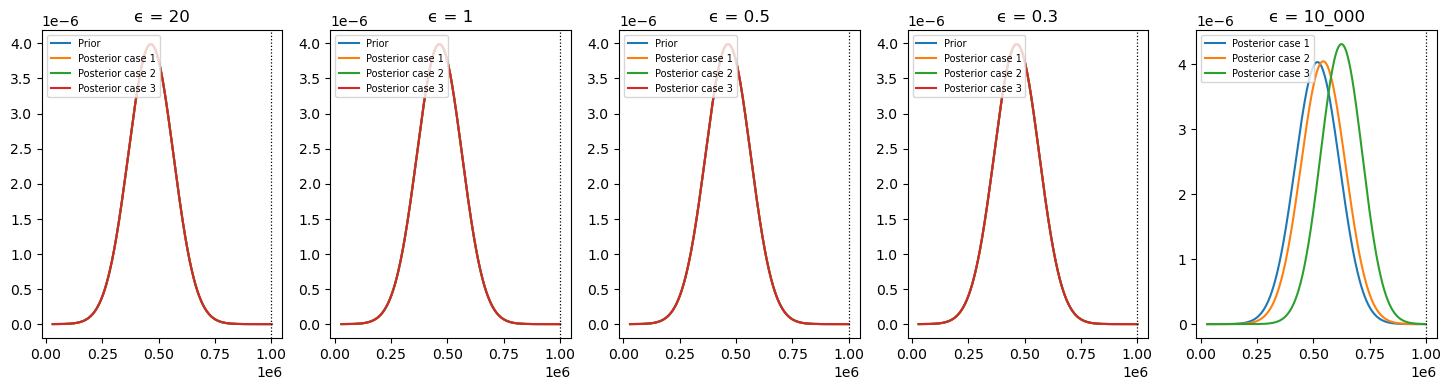

In [32]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(18, 4))

ax0.title.set_text('ϵ = 20')
ax1.title.set_text('ϵ = 1')
ax2.title.set_text('ϵ = 0.5')
ax3.title.set_text('ϵ = 0.3')
ax4.title.set_text('ϵ = 10_000')


x = np.linspace(30000,1000000,500)

prior1 = norm.pdf(x, loc=465000, scale=100000)
posterior1a = output_dist_case_4_exp1a.gm.marg_pdf(x, 0)
posterior1b = output_dist_case_4_exp1b.gm.marg_pdf(x, 0)
posterior1c = output_dist_case_4_exp1c.gm.marg_pdf(x, 0)

posterior2a = output_dist_case_4_exp2a.gm.marg_pdf(x, 0)
posterior2b = output_dist_case_4_exp2b.gm.marg_pdf(x, 0)
posterior2c = output_dist_case_4_exp2c.gm.marg_pdf(x, 0)

posterior3a = output_dist_case_4_exp3a.gm.marg_pdf(x, 0)
posterior3b = output_dist_case_4_exp3b.gm.marg_pdf(x, 0)
posterior3c = output_dist_case_4_exp3c.gm.marg_pdf(x, 0)

posterior_high_eps1 = output_dist_high_eps1.gm.marg_pdf(x, 0)
posterior_high_eps2 = output_dist_high_eps2.gm.marg_pdf(x, 0)
posterior_high_eps3 = output_dist_high_eps3.gm.marg_pdf(x, 0)

posterior_10khigh_eps1 = output_dist_10khigh_eps1.gm.marg_pdf(x, 0)
posterior_10khigh_eps2 = output_dist_10khigh_eps2.gm.marg_pdf(x, 0)
posterior_10khigh_eps3 = output_dist_10khigh_eps3.gm.marg_pdf(x, 0)


ax0.plot(x, prior1, label='Prior')
ax1.plot(x, prior1, label='Prior')
ax2.plot(x, prior1, label='Prior')
ax3.plot(x, prior1, label='Prior')

ax0.plot(x, posterior_high_eps1, label='Posterior case 1')
ax0.plot(x, posterior_high_eps2, label='Posterior case 2')
ax0.plot(x, posterior_high_eps3, label='Posterior case 3')

ax1.plot(x, posterior1a, label='Posterior case 1')
ax1.plot(x, posterior2a, label='Posterior case 2')
ax1.plot(x, posterior3a, label='Posterior case 3')


ax2.plot(x, posterior1b, label='Posterior case 1')
ax2.plot(x, posterior2a, label='Posterior case 2')
ax2.plot(x, posterior3a, label='Posterior case 3')

ax3.plot(x, posterior1c, label='Posterior case 1')
ax3.plot(x, posterior2c, label='Posterior case 2')
ax3.plot(x, posterior3c, label='Posterior case 3')

ax4.plot(x, posterior_10khigh_eps1, label='Posterior case 1')
ax4.plot(x, posterior_10khigh_eps2, label='Posterior case 2')
ax4.plot(x, posterior_10khigh_eps3, label='Posterior case 3')

w = 0.3
w2130 = 0.9
for val in meanm2130_4:
    if(val == 999999):
        ax0.axvline( val, color="black",linestyle = 'dotted',linewidth=w2130)
        ax1.axvline( val, color="black",linestyle = 'dotted',linewidth=w2130)
        ax2.axvline( val, color="black",linestyle = 'dotted',linewidth=w2130)
        ax3.axvline( val, color="black",linestyle = 'dotted',linewidth=w2130)
        ax4.axvline( val, color="black",linestyle = 'dotted',linewidth=w2130)


ax0.legend(loc="upper left",  fontsize="7")
ax1.legend(loc="upper left",  fontsize="7")
ax2.legend(loc="upper left",  fontsize="7")
ax3.legend(loc="upper left",  fontsize="7")
ax4.legend(loc="upper left",  fontsize="7")
plt.plot()
#plt.savefig("soga_risk_dp.pdf", format="pdf", bbox_inches="tight")

## Case studies with approximate Gaussian semantics
### Code for plots 8, 9 and 10

In [34]:
compiled_cond1=SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/conditional1noobs.soga')
cfg_cond1 = SOGA.produce_cfg(compiled_cond1)
output_dist_cond1 = SOGA.start_SOGA(cfg_cond1)

Text(0.5, 1.0, 'before observation')

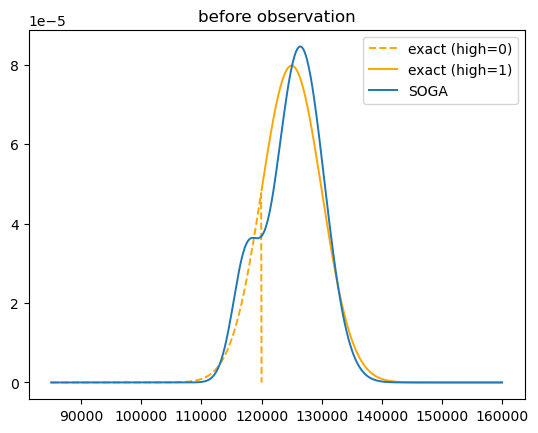

In [35]:
from scipy.stats import truncnorm
from scipy.stats import norm

x = np.linspace(85000,160000,500)

loc = 125000
scale = 5000

p = norm.cdf(120000, loc, scale)

a1, b1 = (120000 - loc)/scale, (np.inf - loc)/scale
a0, b0 = (-np.inf - loc)/scale, (120000 - loc)/scale

x0 = np.linspace(85000,120000,500)
y_exact0 = p*truncnorm.pdf(x0, a0, b0, loc, scale) 
y_exact0[-1] = 0

x1 = np.linspace(120000, 160000, 500)
y_exact1 = (1-p)*truncnorm.pdf(x1, a1, b1, loc, scale) 
y_soga_no_obs = output_dist_cond1.gm.marg_pdf(x, 0)

plt.plot(x0, y_exact0, ls='--', color='orange', label='exact (high=0)', linewidth=1.4)
plt.plot(x1, y_exact1, ls='-', color='orange', label='exact (high=1)', linewidth=1.4)
plt.plot(x, y_soga_no_obs, label='SOGA', linewidth=1.4)
plt.legend()
plt.title('before observation')

In [36]:
compiled_cond1=SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/conditional1obs.soga')
cfg_cond1 = SOGA.produce_cfg(compiled_cond1)
output_dist_cond1 = SOGA.start_SOGA(cfg_cond1)

Text(0.5, 1.0, 'after observation')

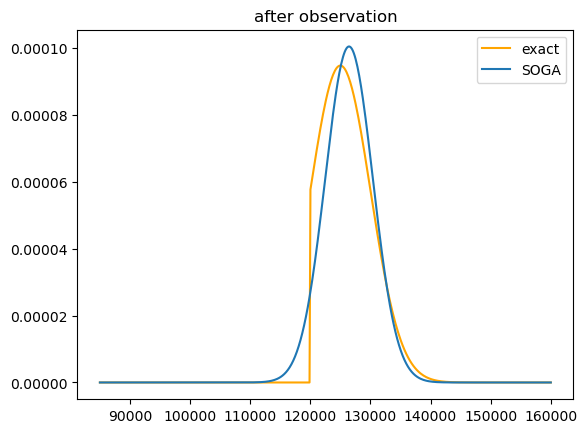

In [37]:
from scipy.stats import truncnorm
from scipy.stats import norm

x = np.linspace(85000,160000,500)

loc = 125000
scale = 5000

p = norm.cdf(120000, loc, scale)

a1, b1 = (120000 - loc)/scale, (np.inf - loc)/scale

y_exact = truncnorm.pdf(x, a1, b1, loc, scale) 
y_soga = output_dist_cond1.gm.marg_pdf(x, 0)

#plt.plot(x0, y_exact0, ls='--', color='orange', label='exact (high=0)')
plt.plot(x, y_exact, ls='-', color='orange', label='exact')
plt.plot(x, y_soga, label='SOGA')
plt.legend()
plt.title('after observation')

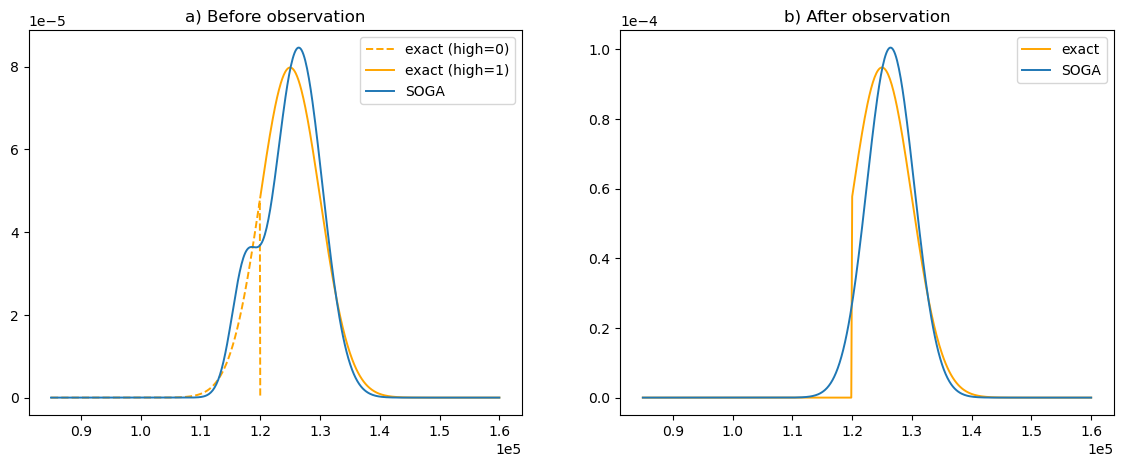

In [38]:
fig, axs = plt.subplots(1,2,figsize=(14,5))

axs[0].plot(x0, y_exact0, ls='--', color='orange', label='exact (high=0)', linewidth=1.4)
axs[0].plot(x1, y_exact1, ls='-', color='orange', label='exact (high=1)', linewidth=1.4)
axs[0].plot(x, y_soga_no_obs, label='SOGA', linewidth=1.4)
axs[0].legend()
axs[0].set_title('a) Before observation')
axs[0].ticklabel_format(style='sci', axis='both', scilimits=(0,0))


axs[1].plot(x, y_exact, ls='-', color='orange', label='exact', linewidth=1.4)
axs[1].plot(x, y_soga, label='SOGA', linewidth=1.4)
axs[1].legend()
axs[1].set_title('b) After observation')
axs[1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.savefig('anonym1.pdf')

In [39]:
# computing exact moments using scipy
exact_mean, exact_var = truncnorm.stats(a1, b1, loc, scale, 'mv')

#moments computed by SOGA
soga_mean = output_dist_cond1.gm.mean()[0]
soga_var = output_dist_cond1.gm.cov()[0,0]

err_mean = abs(exact_mean-soga_mean)/exact_mean
err_var = abs(exact_var-soga_var)/exact_var

print('Exact Posterior Mean: {} | SOGA Posterior Mean: {} | Error: {}'.format(exact_mean, soga_mean, np.round(err_mean,2)))
print('Exact Posterior Var: {} | SOGA Posterior Var: {} | Error: {}'.format(exact_var, soga_var, np.round(err_var,2)))

Exact Posterior Mean: 126437.9998546959 | SOGA Posterior Mean: 126437.9998546959 | Error: 0.0
Exact Posterior Var: 15742157.144415136 | SOGA Posterior Var: 15742157.144414902 | Error: 0.0


In [41]:
compiled_cond2=SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/conditional2.soga')
cfg_cond2 = SOGA.produce_cfg(compiled_cond2)
output_dist_cond2 = SOGA.start_SOGA(cfg_cond2)

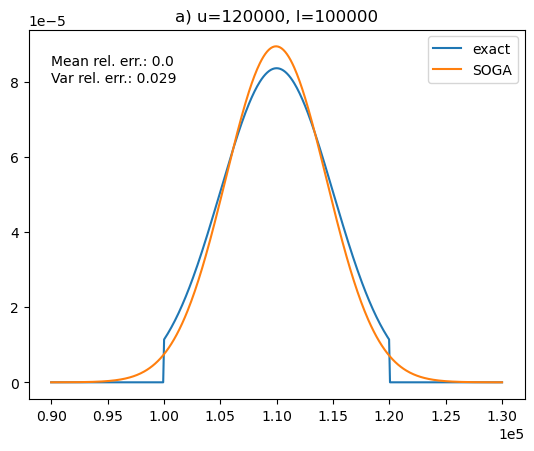

In [42]:
x_a = np.linspace(90000,130000,500)

loc = 110000
scale = 5000
a, b = (100000 - loc)/scale, (120000 - loc)/scale

y_exact_a = truncnorm.pdf(x_a, a, b, loc, scale)
y_soga_a = output_dist_cond2.gm.marg_pdf(x_a, 0)

plt.plot(x_a, y_exact_a, label='exact')
plt.plot(x_a, y_soga_a, label='SOGA')
plt.title('a) u=120000, l=100000')
plt.text(90000, 8e-5, 'Mean rel. err.: 0.0 \nVar rel. err.: 0.029')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.legend()

In [43]:
# computing exact moments using scipy
exact_mean, exact_var = truncnorm.stats(a, b, loc, scale, 'mv')

#moments computed by SOGA
soga_mean = output_dist_cond2.gm.mean()[0]
soga_var = output_dist_cond2.gm.cov()[0,0]

err_mean = abs(exact_mean-soga_mean)/exact_mean
err_var = abs(exact_var-soga_var)/exact_var

print('Exact Posterior Mean: {} | SOGA Posterior Mean: {} | Error: {}'.format(exact_mean, soga_mean, np.round(err_mean,5)))
print('Exact Posterior Var: {} | SOGA Posterior Var: {} | Error: {}'.format(exact_var, soga_var, np.round(err_var,5)))

Exact Posterior Mean: 110000.0 | SOGA Posterior Mean: 109950.62665988362 | Error: 0.00045
Exact Posterior Var: 19343532.58874808 | SOGA Posterior Var: 19903840.105859756 | Error: 0.02897


In [44]:
compiled_cond2b = SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/conditional2b.soga')
cfg_cond2b = SOGA.produce_cfg(compiled_cond2b)
output_dist_cond2b = SOGA.start_SOGA(cfg_cond2b)

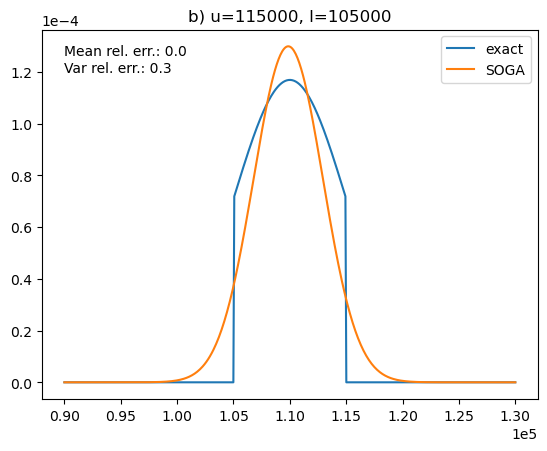

In [45]:
x_b = np.linspace(90000,130000,500)

loc = 110000
scale = 5000
a, b = (105000 - loc)/scale, (115000 - loc)/scale

y_exact_b = truncnorm.pdf(x_b, a, b, loc, scale)
y_soga_b = output_dist_cond2b.gm.marg_pdf(x_b, 0)

plt.plot(x_b, y_exact_b, label='exact')
plt.plot(x_b, y_soga_b, label='SOGA')
plt.title('b) u=115000, l=105000')
plt.text(90000, 1.2e-4, 'Mean rel. err.: 0.0 \nVar rel. err.: 0.3')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.legend()

In [46]:
# computing exact moments using scipy
exact_mean, exact_var = truncnorm.stats(a, b, loc, scale, 'mv')

#moments computed by SOGA
soga_mean = output_dist_cond2b.gm.mean()[0]
soga_var = output_dist_cond2b.gm.cov()[0,0]

err_mean = abs(exact_mean-soga_mean)/exact_mean
err_var = abs(exact_var-soga_var)/exact_var

print('Exact Posterior Mean: {} | SOGA Posterior Mean: {} | Error: {}'.format(exact_mean, soga_mean, np.round(err_mean,2)))
print('Exact Posterior Var: {} | SOGA Posterior Var: {} | Error: {}'.format(exact_var, soga_var, np.round(err_var,2)))

Exact Posterior Mean: 110000.0 | SOGA Posterior Mean: 109859.43385939553 | Error: 0.0
Exact Posterior Var: 7278127.369319826 | SOGA Posterior Var: 9437363.82383728 | Error: 0.3


In [50]:
compiled_cond2c = SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/conditional2c.soga')
cfg_cond2c = SOGA.produce_cfg(compiled_cond2c)
output_dist_cond2c = SOGA.start_SOGA(cfg_cond2c)

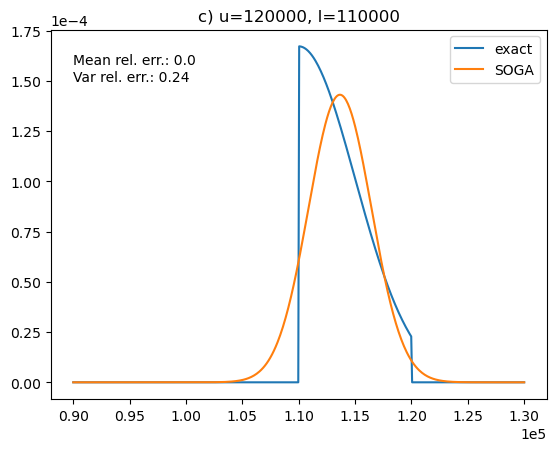

In [51]:
x_c = np.linspace(90000,130000,500)

loc = 110000
scale = 5000
a, b = (110000 - loc)/scale, (120000 - loc)/scale

y_exact_c = truncnorm.pdf(x_c, a, b, loc, scale)
y_soga_c = output_dist_cond2c.gm.marg_pdf(x_c, 0)

plt.plot(x_c, y_exact_c, label='exact')
plt.plot(x_c, y_soga_c, label='SOGA')
plt.title('c) u=120000, l=110000')
plt.text(90000, 1.5e-4, 'Mean rel. err.: 0.0 \nVar rel. err.: 0.24')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.legend()

In [52]:
# computing exact moments using scipy
exact_mean, exact_var = truncnorm.stats(a, b, loc, scale, 'mv')

#moments computed by SOGA
soga_mean = output_dist_cond2c.gm.mean()[0]
soga_var = output_dist_cond2c.gm.cov()[0,0]

err_mean = abs(exact_mean-soga_mean)/exact_mean
err_var = abs(exact_var-soga_var)/exact_var

print('Exact Posterior Mean: {} | SOGA Posterior Mean: {} | Error: {}'.format(exact_mean, soga_mean, np.round(err_mean,2)))
print('Exact Posterior Var: {} | SOGA Posterior Var: {} | Error: {}'.format(exact_var, soga_var, np.round(err_var,2)))

Exact Posterior Mean: 113613.94876122616 | SOGA Posterior Mean: 113657.4733456084 | Error: 0.0
Exact Posterior Var: 6282906.939980029 | SOGA Posterior Var: 7773849.508197784 | Error: 0.24


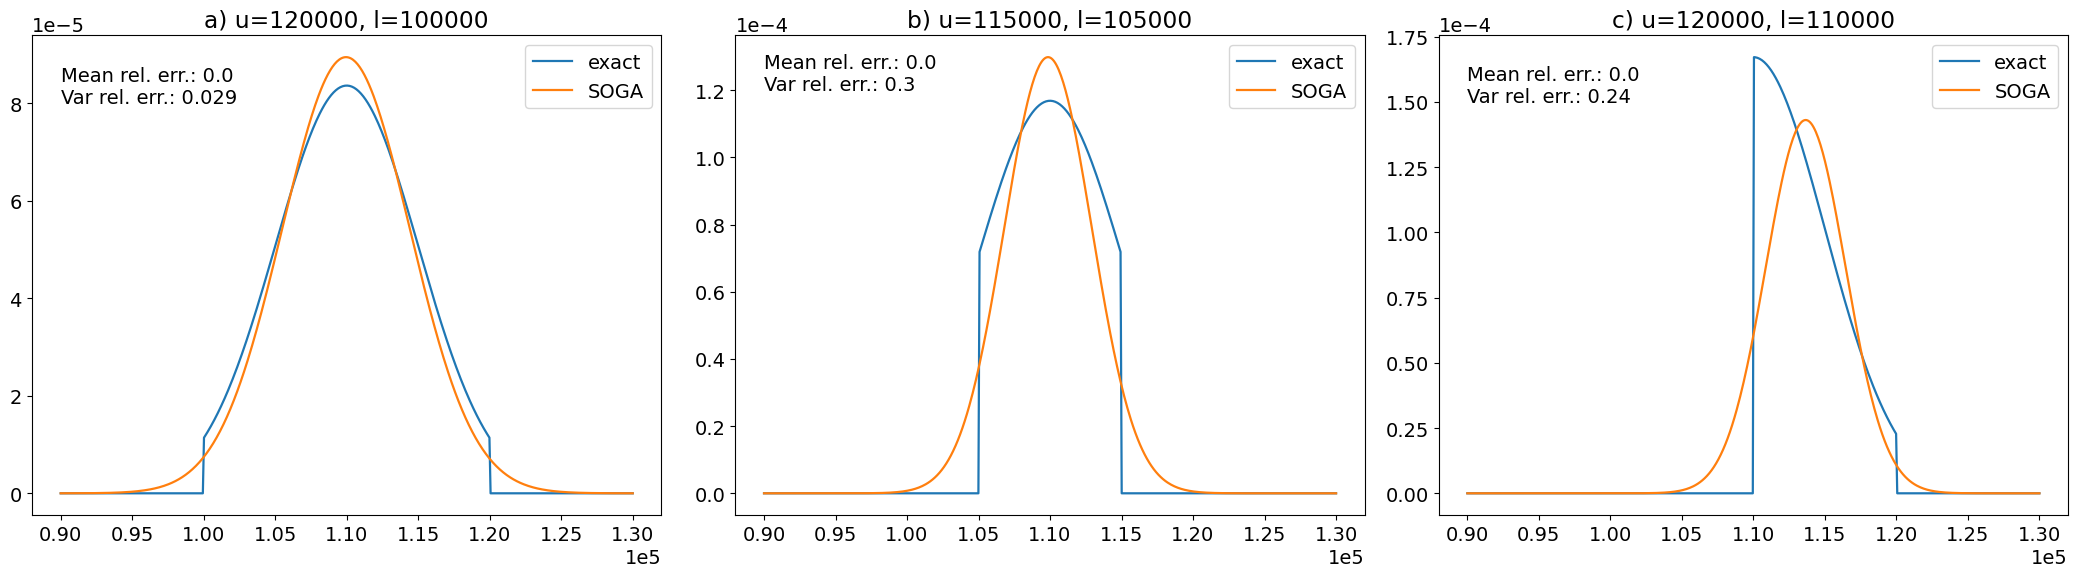

In [53]:
plt.rcParams['font.size'] = 14

fig, axs = plt.subplots(1,3,figsize=(21,6))

axs[0].plot(x_a, y_exact_a, label='exact', linewidth=1.6)
axs[0].plot(x_a, y_soga_a, label='SOGA', linewidth=1.6)
axs[0].set_title('a) u=120000, l=100000')
axs[0].text(90000, 8e-5, 'Mean rel. err.: 0.0 \nVar rel. err.: 0.029', fontsize=14)
axs[0].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
axs[0].legend()

axs[1].plot(x_b, y_exact_b, label='exact', linewidth=1.6)
axs[1].plot(x_b, y_soga_b, label='SOGA', linewidth=1.6)
axs[1].set_title('b) u=115000, l=105000')
axs[1].text(90000, 1.2e-4, 'Mean rel. err.: 0.0 \nVar rel. err.: 0.3', fontsize=14)
axs[1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
axs[1].legend()

axs[2].plot(x_c, y_exact_c, label='exact', linewidth=1.6)
axs[2].plot(x_c, y_soga_c, label='SOGA', linewidth=1.6)
axs[2].set_title('c) u=120000, l=110000')
axs[2].text(90000, 1.5e-4, 'Mean rel. err.: 0.0 \nVar rel. err.: 0.24', fontsize=14)
axs[2].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
axs[2].legend()

plt.tight_layout()
plt.savefig('anonym2.pdf')

## Laplacian Noise 

with pm.Model() as laplace_dp_no_obs:
    DB_size = 10
    num_lower = 2
    inc_lower = pm.Uniform('inc_lower',200, 400, shape=num_lower)
    inc_higher = pm.Uniform('inc_higher',300, 600, shape=DB_size-num_lower)
    avg_income = (inc_lower.sum() + inc_higher.sum()) / DB_size
    Delta = 600/DB_size # sensitivity
    epsilon = 1
    noise = pm.Laplace('noise',mu=0,b=Delta/epsilon) # the variance of this Laplace distribution is 2b^2
    output = pm.Deterministic('output', avg_income + noise) # this operation only shifts the mean of the Laplace
    trace_no_obs = pm.sample(20000)

In [63]:
output3pymc = np.loadtxt("programs/SOGA/Privug/rasmus/Laplace/output3.txt")
print('Mean: ', np.round(np.mean(output3pymc), 3))
print('Var: ', np.round(np.var(output3pymc), 3))

Mean:  419.933
Var:  7864.459


In [67]:
file = 'programs/SOGA/Privug/rasmus/Laplace/Laplace3.soga'
compiledFile = SOGA.compile2SOGA(file)
cfg = SOGA.produce_cfg(compiledFile)

start = time.time()
output3soga = SOGA.start_SOGA(cfg)
end = time.time()
print('Computed in {}'.format(np.round(end-start,2)))

Computed in 0.69


In [68]:
idx = output3soga.var_list.index('sum')

mean_soga = output3soga.gm.mean()[idx]
var_soga = output3soga.gm.cov()[idx, idx]
std_soga = np.sqrt(var_soga)

print('Mean: ', np.round(mean_soga, 3))
print('Var: ', np.round(var_soga, 3))

Mean:  419.963
Var:  7893.393


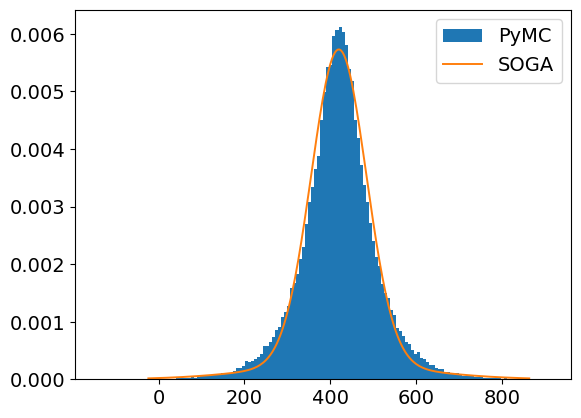

In [69]:
x = np.linspace(mean_soga-5*std_soga, mean_soga+5*std_soga, 250)

_ = plt.hist(output3pymc, bins=150, density=True, label='PyMC', linewidth=1.4)
_ = plt.plot(x, output3soga.gm.marg_pdf(x,idx), label='SOGA', linewidth=1.4)
_ = plt.legend(fontsize='14')

plt.savefig('laplace.pdf')

# Scalability 

In [60]:

def soga_infer(file):
    compiled = SOGA.compile2SOGA(file)
    cfg = SOGA.produce_cfg(compiled)
    output = SOGA.start_SOGA(cfg)
    return output

def time_soga(size, file):
    t_init = time.time()
    soga_infer(file)
    total_time = time.time() - t_init
    print(f'SOGA | Size {size} | Time {total_time}')
    return total_time

## No conditioning

In [ ]:
SOGA_100  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_100.soga'
SOGA_250  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_250.soga'
SOGA_500  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_500.soga'
SOGA_1000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_1000.soga'
SOGA_2000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_2000.soga'
SOGA_4000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_4000.soga'
SOGA_6000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_6000.soga'


FILES_SOGA    = [(100,SOGA_100), (250,SOGA_250), (500,SOGA_500), (1000,SOGA_1000), (2000,SOGA_2000), (4000,SOGA_4000), (6000,SOGA_6000)]

NUM_VARS = [100, 250, 500, 1000, 2000, 4000, 6000]

times_soga       = [time_soga(size,file) for (size,file) in FILES_SOGA]

In [ ]:
NUM_VARS_Privug = [50, 100, 200, 300, 400, 500, 800,900,1000,1100,1200,1300,1400, 1500, 2000, 3000, 4000, 5000, 6000]

times_privug = [0.0028066635131835938,0.004198551177978516,0.008395195007324219, 0.015213727951049805, 0.023733139038085938,0.03996086120605469,
                0.3027377128601074, 0.2061481475830078, 0.31394457817077637, 0.41750049591064453, 0.5550978183746338, 0.7143032550811768, 1.0748748779296875, 1.0867042541503906,
               3.4510347843170166, 12.85947036743164, 32.54612398147583, 67.13258385658264, 117.35088992118835]



In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(7,4))
axs.plot(NUM_VARS,times_soga,'-o',label='SOGA')
axs.plot(NUM_VARS_Privug,times_privug,'-o',label='Privug')
#axs.axvline(x=1500, linestyle='dashed', label='SOGA max recursion depth')
axs.set_xlabel("Number variables")
axs.set_ylabel("Seconds")
axs.legend();

## Conditioning

In [ ]:
SOGA_100  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/varscond/eval_soga_scale_100.soga'
SOGA_250  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/varscond/eval_soga_scale_250.soga'
SOGA_500  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/varscond/eval_soga_scale_500.soga'
SOGA_1000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/varscond/eval_soga_scale_1000.soga'
SOGA_2000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/varscond/eval_soga_scale_2000.soga'
SOGA_4000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/varscond/eval_soga_scale_4000.soga'
SOGA_6000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/varscond/eval_soga_scale_6000.soga'


FILES_SOGA    = [(100,SOGA_100), (250,SOGA_250), (500,SOGA_500), (1000,SOGA_1000), (2000,SOGA_2000), (4000,SOGA_4000), (6000,SOGA_6000)]

NUM_VARS = [100, 250, 500, 1000, 2000, 4000, 6000]

times_soga       = [time_soga(size,file) for (size,file) in FILES_SOGA]

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(7,4))
axs.plot(NUM_VARS,times_soga,'-o',label='SOGA')
axs.plot(NUM_VARS_Privug,times_privug,'-o',label='Privug')
#axs.axvline(x=1500, linestyle='dashed', label='SOGA max recursion depth')
axs.set_xlabel("Number variables")
axs.set_ylabel("Seconds")
axs.legend();

### OLD

In [16]:

# Scalability of SOGA
SOGA_50  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_50.soga'
SOGA_100  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_100.soga'
SOGA_200  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_200.soga'
SOGA_300  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_300.soga'
SOGA_400  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_300.soga'
SOGA_500  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_500.soga'
SOGA_600  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_600.soga'

SOGA_800  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_800.soga'
SOGA_900  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_900.soga'
SOGA_1000  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1000.soga'
SOGA_1100  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1100.soga'
SOGA_1200  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1200.soga'
SOGA_1300  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1300.soga'
SOGA_1400  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1400.soga'

SOGA_50_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_50.soga'
SOGA_100_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_100.soga'
SOGA_200_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_200.soga'
SOGA_300_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_300.soga'
SOGA_400_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_400.soga'
SOGA_500_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_500.soga'

SOGA_800_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_800.soga'
SOGA_900_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_900.soga'
SOGA_1000_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_1000.soga'
SOGA_1100_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_1100.soga'
SOGA_1200_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_1200.soga'
SOGA_1300_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_1300.soga'
SOGA_1400_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_1400.soga'

#FILES_SOGA    = [(800,SOGA_800), (900,SOGA_900), (1000,SOGA_1000),(1100,SOGA_1100), (1200,SOGA_1200), (1300,SOGA_1300), (1400, SOGA_1400)]
#FILES_SOGA_COND    = [(800,SOGA_800_COND), (900,SOGA_900_COND), (1000,SOGA_1000_COND),(1100,SOGA_1100_COND), (1200,SOGA_1200_COND), (1300,SOGA_1300_COND), (1400, SOGA_1400_COND)]
FILES_SOGA_COND = [(50, SOGA_50_COND ), (100, SOGA_100_COND ), (200, SOGA_200_COND ), (300, SOGA_300_COND ),(400, SOGA_400_COND ), (500, SOGA_500_COND )]
FILES_SOGA = [(50, SOGA_50), (100, SOGA_100), (200, SOGA_200), (300, SOGA_300),(400, SOGA_400), (500, SOGA_500)]
NUM_VARS = [50, 100, 200, 300, 400, 500]

In [9]:
def soga_infer(file):
    compiled = SOGA.compile2SOGA(file)
    cfg = SOGA.produce_cfg(compiled)
    output = SOGA.start_SOGA(cfg)
    return output

def time_soga(size, file):
    t_init = time.time()
    soga_infer(file)
    total_time = time.time() - t_init
    print(f'SOGA | Size {size} | Time {total_time}')
    return total_time

In [10]:
times_soga       = [time_soga(size,file) for (size,file) in FILES_SOGA]

SOGA | Size 50 | Time 0.11563491821289062
SOGA | Size 100 | Time 0.5585687160491943
SOGA | Size 200 | Time 3.9025840759277344
SOGA | Size 300 | Time 13.02191686630249
SOGA | Size 400 | Time 12.810483455657959
SOGA | Size 500 | Time 62.57484197616577


In [17]:
times_soga_cond       = [time_soga(size,file) for (size,file) in FILES_SOGA_COND]

SOGA | Size 50 | Time 0.11406421661376953
SOGA | Size 100 | Time 0.5629174709320068
SOGA | Size 200 | Time 4.024440050125122
SOGA | Size 300 | Time 13.93421459197998
SOGA | Size 400 | Time 32.07499623298645
SOGA | Size 500 | Time 65.02048826217651


Scale with no condition 

Privug exact | Size 800 | Time 0.007296562194824219
Privug exact | Size 900 | Time 0.0029883384704589844
Privug exact | Size 1000 | Time 0.003086090087890625
Privug exact | Size 1100 | Time 0.0032761096954345703
Privug exact | Size 1200 | Time 0.0034737586975097656
Privug exact | Size 1300 | Time 0.003620624542236328
Privug exact | Size 1400 | Time 0.003820180892944336
Privug exact | Size 1500 | Time 0.0038912296295166016
Privug exact | Size 2000 | Time 0.00494074821472168
Privug exact | Size 3000 | Time 0.007329702377319336
Privug exact | Size 4000 | Time 0.009478569030761719
Privug exact | Size 5000 | Time 0.012460470199584961
Privug exact | Size 6000 | Time 0.01391911506652832
Privug exact | Size 7000 | Time 0.01769399642944336
Privug exact | Size 8000 | Time 0.019052743911743164
Privug exact | Size 9000 | Time 0.022161006927490234
Privug exact | Size 10000 | Time 0.022896289825439453

Scale with a condition 

Privug exact | Size 800 | Time 0.002747774124145508
Privug exact | Size 900 | Time 0.00436711311340332
Privug exact | Size 1000 | Time 0.003152132034301758
Privug exact | Size 1100 | Time 0.0031952857971191406
Privug exact | Size 1200 | Time 0.0030853748321533203
Privug exact | Size 1300 | Time 0.003484487533569336
Privug exact | Size 1400 | Time 0.004073619842529297
Privug exact | Size 1500 | Time 0.003667593002319336
Privug exact | Size 2000 | Time 0.0049169063568115234
Privug exact | Size 3000 | Time 0.007868766784667969
Privug exact | Size 4000 | Time 0.008997917175292969
Privug exact | Size 5000 | Time 0.012352943420410156
Privug exact | Size 6000 | Time 0.014581441879272461
Privug exact | Size 7000 | Time 0.01537466049194336
Privug exact | Size 8000 | Time 0.02023148536682129
Privug exact | Size 9000 | Time 0.02020549774169922
Privug exact | Size 10000 | Time 0.0222170352935791

In [13]:
#NUM_VARS_Privug = [800,900,1000,1100,1200,1300,1400, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
NUM_VARS_Privug = [50, 100, 200, 300, 400, 500, 800,900,1000,1100,1200,1300,1400, 1500, 2000, 3000, 4000, 5000, 6000]
#times_privug    = [0.007296562194824219,0.0029883384704589844, 0.003086090087890625,  0.0032761096954345703, 0.0034737586975097656, 0.003620624542236328, 0.003820180892944336,
 #                 0.0038912296295166016,0.00494074821472168,0.007329702377319336, 0.009478569030761719, 0.012460470199584961, 0.01391911506652832, 0.01769399642944336,
  #                0.019052743911743164, 0.022161006927490234, 0.022896289825439453]

times_privug = [0.0028066635131835938,0.004198551177978516,0.008395195007324219, 0.015213727951049805, 0.023733139038085938,0.03996086120605469,
                0.3027377128601074, 0.2061481475830078, 0.31394457817077637, 0.41750049591064453, 0.5550978183746338, 0.7143032550811768, 1.0748748779296875, 1.0867042541503906,
               3.4510347843170166, 12.85947036743164, 32.54612398147583, 67.13258385658264, 117.35088992118835]

#times_privug_cond = [0.002747774124145508, 0.00436711311340332, 0.003152132034301758,0.0031952857971191406, 0.0030853748321533203, 0.003484487533569336,
 #                   0.004073619842529297,0.003667593002319336, 0.0049169063568115234, 0.007868766784667969, 0.008997917175292969,0.012352943420410156,
  #                  0.014581441879272461,0.01537466049194336, 0.02023148536682129, 0.02020549774169922,  0.0222170352935791 ]
times_privug_cond = [0.0051724910736083984, 0.005353212356567383, 0.007938623428344727, 0.012955665588378906, 0.020505189895629883, 0.03209662437438965,
                    0.11232233047485352, 0.15134882926940918, 0.24138379096984863, 0.3682541847229004, 0.4311661720275879, 0.570500373840332, 0.7092206478118896,
                    1.0348293781280518, 2.27811598777771, 12.772864818572998, 34.05943155288696, 65.12331938743591, 120.42336559295654]

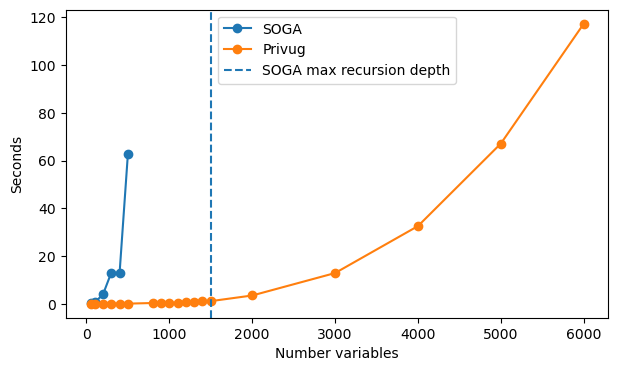

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(7,4))
#axs.plot(NUM_VARS,times_soga,'-o',label='SOGA')
axs.plot(NUM_VARS_Privug,times_privug,'-o',label='Privug')
axs.axvline(x=1500, linestyle='dashed', label='SOGA max recursion depth')
axs.set_xlabel("Number variables")
axs.set_ylabel("Seconds")
axs.legend();

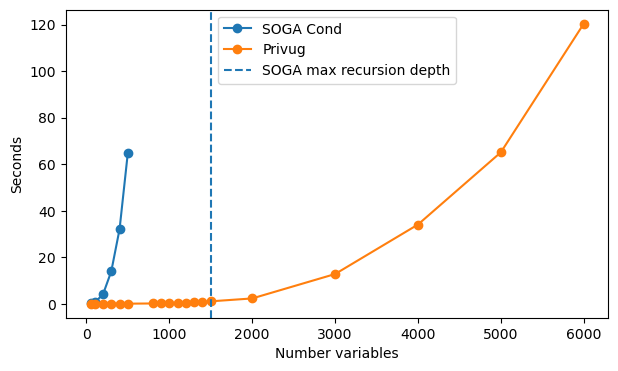

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(7,4))
#axs.plot(NUM_VARS,times_soga_cond,'-o',label='SOGA Cond')
axs.plot(NUM_VARS_Privug,times_privug_cond,'-o',label='Privug')
axs.axvline(x=1500, linestyle='dashed', label='SOGA max recursion depth')
axs.set_xlabel("Number variables")
axs.set_ylabel("Seconds")
axs.legend();